In [1]:
import scipy as sp
import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sp.set_printoptions(precision=3, linewidth=300)

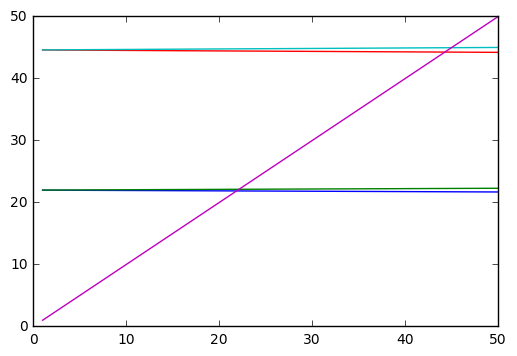

In [28]:
Id = 7.06
Ip = 13.69
m = 50
u = 0.01
tau = 1

# Calculo da rigidez segundo o modelo de rotor de Stobola-Green
E = 211e9
d = 0.15
L= 1
J = sp.pi*d**4 / 64
k11 = 12*E*J/(L**3)
k12 = -6*E*J/(L**2)
k22 = 4*E*J/L

# Para esse modelo, assumuiu-se que os coeficientes de amortecimento podem ser dados como função da matriz de massa
# e da matriz de rigidez.

# De modo a simplificar a análise, supõe-se que os coeficientes de amortecimento são função somente da rigidez,
# como está expresso abaixo

C11 =k11/10000
C12 =k12/10000
C22 =k22/10000

omega = sp.linspace(1, 50, 1000)
M = sp.array([[m, 0],
                [0, m]])
Id0 = sp.array([[Id, 0],
                [0, Id]])

IP = sp.array([[0, Ip],
                [-Ip, 0]])

I = sp.eye(len(Id0))
Z = sp.zeros_like(Id0)

MId0 = sp.vstack([sp.hstack([         M,           Z]),
                    sp.hstack([Z, Id0])])
K11 = sp.array([[k11, 0],
              [0, k11]])
K12 = sp.array([[k12, 0],
              [0, k12]])
K22 = sp.array([[k22, 0],
              [0, k22]])
K = sp.vstack([sp.hstack([         K11,           K12]),
                    sp.hstack([K12, K22])])

C11 = sp.array([[C11, 0],
              [0, C11]])
C12 = sp.array([[C12, 0],
              [0, C12]])
C22 = sp.array([[C22, 0],
              [0, C22]])
C = sp.vstack([sp.hstack([         C11,           C12]),
                    sp.hstack([C12, C22])])

G = sp.vstack([sp.hstack([         Z,           Z]),
                    sp.hstack([Z, IP])])

I1 = sp.eye(len(MId0))
Z1 = sp.zeros_like(MId0)
MId0inv = la.inv(MId0)
    
fw = []
bw = []
fw2 =[]
bw2 =[]
for w in omega:
    A = sp.vstack([sp.hstack([         Z1,            I1]),
                    sp.hstack([-MId0inv @ K, -MId0inv @ (G*w + C)])])
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    wn = (sp.sqrt(evalues)).real
    bw.append(wn[4])
    fw.append(wn[5])
    bw2.append(wn[6])
    fw2.append(wn[7])
plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, bw2)
plt.plot(omega, fw2)
plt.plot(omega, omega)

In [22]:
def funcbw(x, t): #considera um valor menor do que a primeira frequencia natural
    w = 15
    A = sp.vstack([sp.hstack([         Z1,            I1]),
                    sp.hstack([-MId0inv @ K, -MId0inv @ (G*w+ C)])])
    f = [0,0,0,0,m*u*w**2 * sp.cos(w*t),m*u*w**2 * sp.sin(w*t),(Ip-Id)*tau*w**2 * sp.cos(w*t),(Ip-Id)*tau*w**2 * sp.sin(w*t)]
    dxdt = A @ x + f
    
    return dxdt

In [23]:
def funcfw(x, t): #considera um valor maior do que a primeira frequencia natural do sistema
    w = 30
    A = sp.vstack([sp.hstack([         Z1,            I1]),
                    sp.hstack([-MId0inv @ K, -MId0inv @ (G*w+ C)])])
    f = [0,0,0,0,m*u*w**2 * sp.cos(w*t),m*u*w**2 * sp.sin(w*t),(Ip-Id)*tau*w**2 * sp.cos(w*t),(Ip-Id)*tau*w**2 * sp.sin(w*t)]
    dxdt = A @ x + f
    
    return dxdt

In [24]:
# Condições iniciais
x0=0.001
dx0=0
y0=0
dy0=0

thetax0=0.0
dthetax0=0
thetay0=0
dthetay0=0

#Criar array com condições iniciais
z0 = [x0, y0, thetax0, thetay0, dx0, dy0, dthetax0, dthetay0]

# Criar array com o tempo
tf = 10
t = sp.linspace(0, tf, 10000)

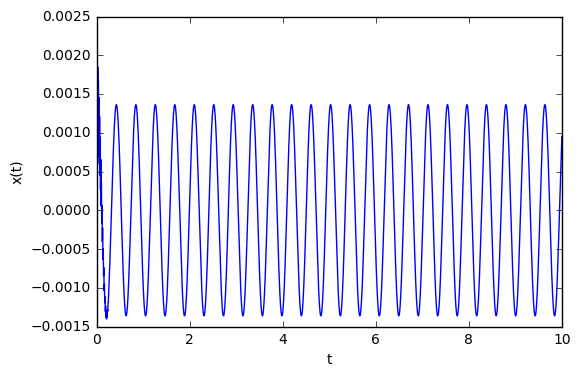

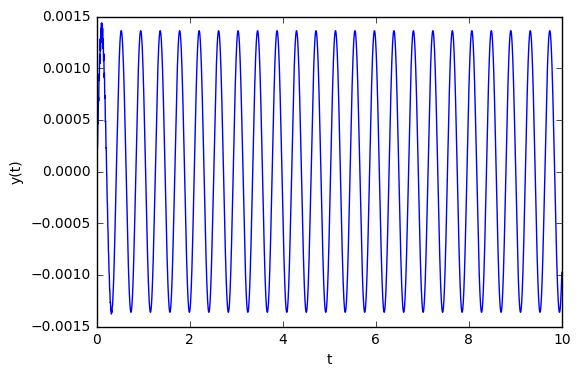

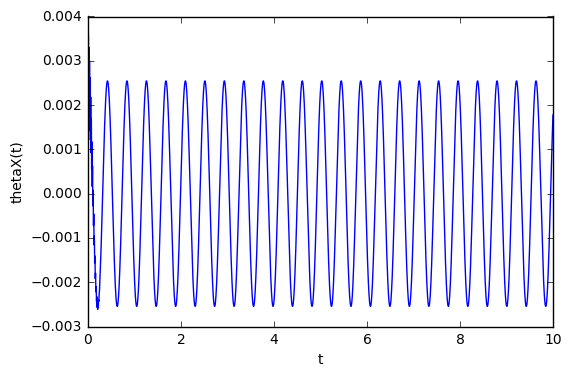

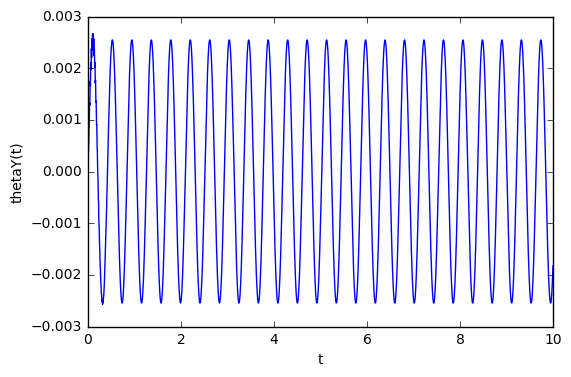

In [25]:
# Resolvendo o sistema para o caso da frequencia applicada possuir valor menor do que a primeira frequencia natural do sistema
# E mostrando as variações no tempo de cada variável.

solbw = odeint(funcbw, z0, t,)
plt.plot(t, solbw[:,0],)
plt.ylabel('x(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, solbw[:,1])
plt.ylabel('y(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, solbw[:,2])
plt.ylabel('thetaX(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, solbw[:,3])
plt.ylabel('thetaY(t)')
plt.xlabel('t')
plt.show()

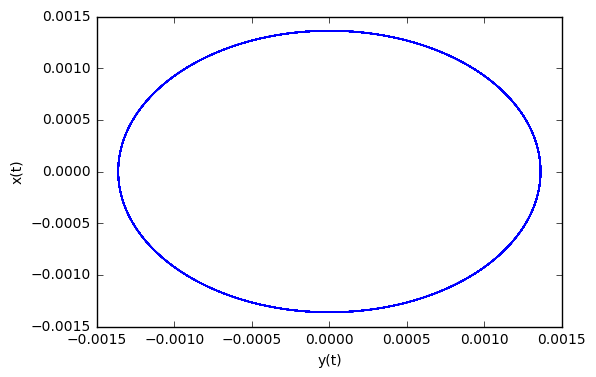

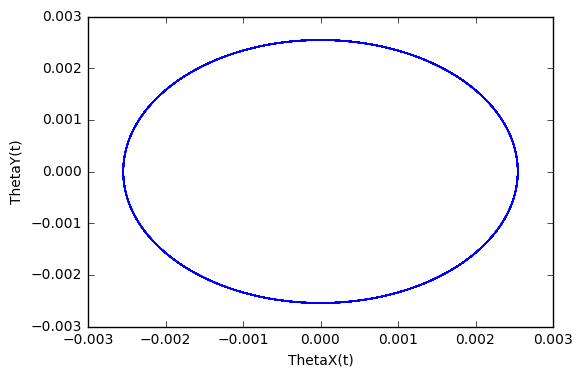

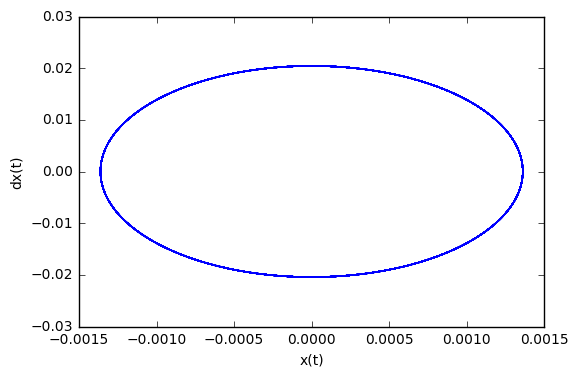

In [26]:
plt.plot(solbw[2000:,0], solbw[2000:,1])
plt.ylabel('x(t)')
plt.xlabel('y(t)')
plt.show()

plt.plot(solbw[2000:,2], solbw[2000:,3])
plt.ylabel('ThetaY(t)')
plt.xlabel('ThetaX(t)')
plt.show()

plt.plot(solbw[2000:,0], solbw[2000:,4])
plt.ylabel('dx(t)')
plt.xlabel('x(t)')
plt.show()

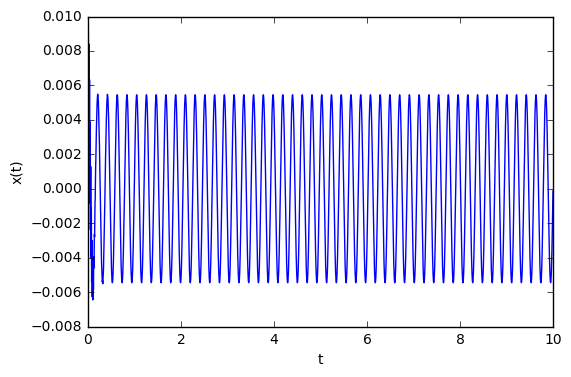

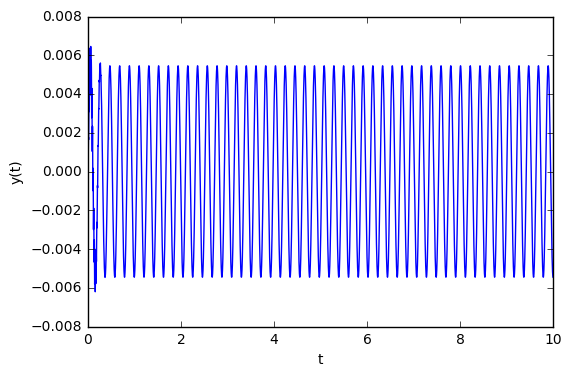

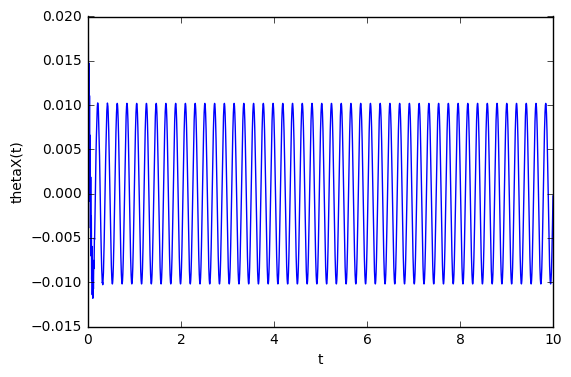

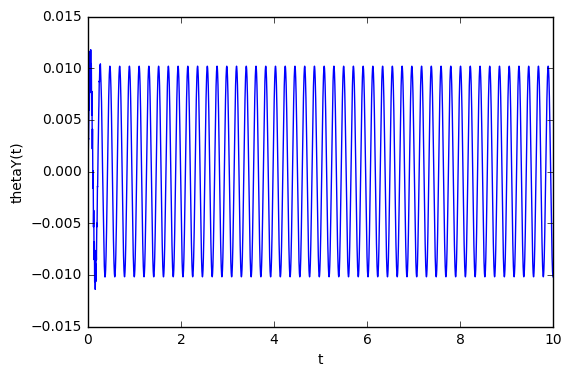

In [8]:
# Resolvendo o sistema para o caso da frequencia applicada possuir valor maior do que a primeira frequencia natural do sistema
# E mostrando as variações no tempo de cada variável.

solfw = odeint(funcfw, z0, t,)
plt.plot(t, solfw[:,0],)
plt.ylabel('x(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, solfw[:,1])
plt.ylabel('y(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, solfw[:,2])
plt.ylabel('thetaX(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, solfw[:,3])
plt.ylabel('thetaY(t)')
plt.xlabel('t')
plt.show()

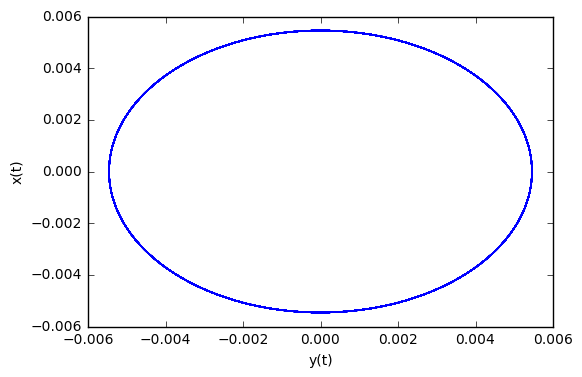

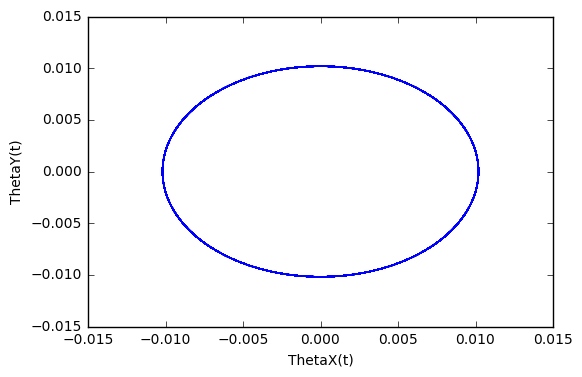

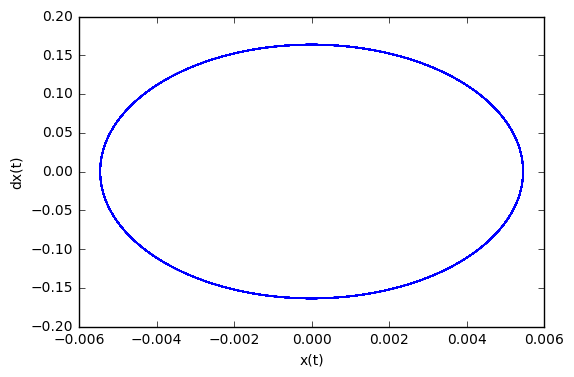

In [9]:
plt.plot(solfw[2000:,0], solfw[2000:,1])
plt.ylabel('x(t)')
plt.xlabel('y(t)')
plt.show()

plt.plot(solfw[2000:,2], solfw[2000:,3])
plt.ylabel('ThetaY(t)')
plt.xlabel('ThetaX(t)')
plt.show()

plt.plot(solfw[2000:,0], solfw[2000:,4])
plt.ylabel('dx(t)')
plt.xlabel('x(t)')
plt.show()